In [1]:
import pandas as pd
import numpy as np
import regex as re
import pylab as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plot

In [2]:
#pd.set_option('display.max_rows', None)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../data/attacks.csv', low_memory=False, encoding= "ISO-8859-1")
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
data.shape

(25723, 24)

<AxesSubplot: >

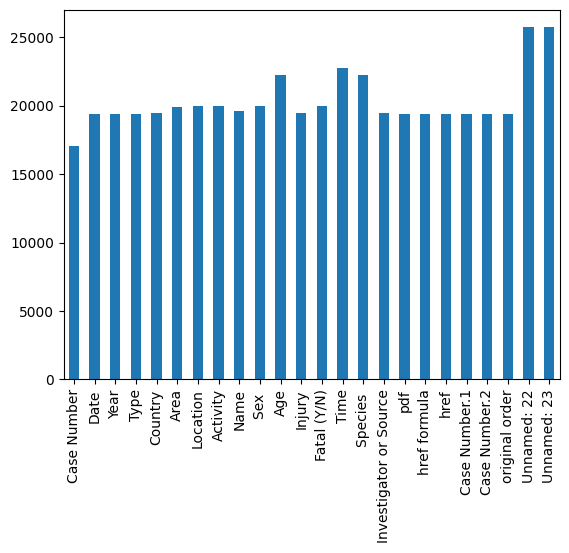

In [7]:
data.isnull().sum().plot.bar()

In [8]:
#Revisamos los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Borro nulos

In [9]:
# Elimino filas con valores nulos puesto que no se pueden eliminar columnas
data.dropna(how = "all", inplace = True)

In [10]:
data.shape

(8703, 24)

In [11]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Elimino duplicados

In [12]:
# Con drop_duplicates eliminamos duplicados

In [13]:
data=data.drop_duplicates()
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(6311, 24)

In [16]:
#Compruebo que no existen más duplicados

data.duplicated().any()

False

In [17]:
data.shape

(6311, 24)

In [20]:
# NO tiene sentido que sigamos manteniendo las columnas con valores nulos (a pesar de las restricciones)

In [21]:
# Volvemos a explorar columnas que contengan nulos

In [22]:
# Las columnas que más nulos contienen son: Age, Time y Species

### Cambiar 'null' por 'Unknown'

In [23]:
data["Type"] = data["Type"].fillna('Unknown')

In [26]:
data.shape

(6311, 24)

In [27]:
# Aquí me doy cuenta de que sustituir valores nulos por 'Unknowns' NO SIRVE PARA NADA!!

In [28]:
# Aquí es cuando empiezo a formular una "teoría/hipótesis" que es, centrarme en un ÚNICO país (tengo datos de demasiados países)

In [29]:
data['Country'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [30]:
# df_cleaning = data[data['Country'] == 'USA']

In [31]:
df_cleaning = data

In [32]:
df_cleaning.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5904,1871.08.00,Aug-1871,1871.0,Provoked,USA,New York,Long Island,Shark fishing,NaN,M,NaN,Hand injured PROVOKED INCIDENT,N,NaN,NaN,"New York Times, 8/26/1871",1871.08.00-SharkFisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1871.08.00,1871.08.00,399.0,NaN,NaN
5303,1916.07.13,13-Jul-1916,1916.0,Unprovoked,USA,New York,"Sheepshead Bay, Brooklyn",Swimming,Thomas Richards,M,NaN,Ankle bruised,N,NaN,NaN,"NY Tribune, 7/14/1916",1916.07.13.a-Richards.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.07.13,1916.07.13,1000.0,NaN,NaN
2257,1997.04.20,20-Apr-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Manguinhos, Ilha Feia, Búzios",Windsurfing,João Pedro Portinari Leão,M,22,Lower left leg & ankle bitten,N,NaN,3.7m to 4.2 m white shark,"O. Gadig; Globo, 4/24/1997",1997.04.20-Leao.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.04.20,1997.04.20,4046.0,NaN,NaN
2714,1988.09.28,28-Sep-1988,1988.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chris Garvin,M,21,Lacerations to foot,N,Afternoon,5' shark,"News-Journal, 9/29/1988",1988.09.28-Garvin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.09.28,1988.09.28,3589.0,NaN,NaN
1423,2006.10.07,07-Oct-2006,2006.0,Unprovoked,USA,Texas,"Isla Blanca Park, South Padre Island",Surfing,Freddy Torres,M,NaN,Lacerations to lower left leg,N,NaN,1' to 4' shark,"M. Martinez, KGBT4",2006.10.07-Torres.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.10.07,2006.10.07,4880.0,NaN,NaN


In [33]:
#data["Country"].value_counts().plot.bar()

In [34]:
# Con regex es posible tomar todos los valores que sean exclusivamente numéricos y el resto pasarlos a NaN
# Puedes reemplazar NaN por la media

In [35]:
df_cleaning.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [36]:
#Creo nueva variable df_cleaning y empiezo a verlo más claro

In [37]:
# Para varias columnas, doble corchete
#df_cleaning = df_cleaning[['Date', 'Year', 'Type', 'Country', 'Area',
#       'Activity', 'Sex ', 'Age', 'Fatal (Y/N)']].reset_index(drop=True)

In [38]:
#Con este gráfico empiezo a darme cuenta que los hombres son más atacados que las mujeres

In [39]:
df_cleaning.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [40]:
df_cleaning.isnull().sum().sort_values()

Type                         0
Case Number                  1
original order               2
Date                         9
Case Number.2                9
Case Number.1                9
href                         9
pdf                          9
href formula                10
Year                        11
Investigator or Source      26
Injury                      37
Country                     59
Name                       219
Area                       464
Fatal (Y/N)                548
Location                   549
Activity                   553
Sex                        574
Age                       2840
Species                   2847
Time                      3363
Unnamed: 23               6309
Unnamed: 22               6310
dtype: int64

### Convertir a numéricos

In [41]:
#Seguimos limpiando convirtiendo columnas con datos numéricos a su formato adecuado 

In [42]:
#Por ejemplo: La columna 'Year' a int.

In [43]:
df_cleaning.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
159,2017.04.12.a,12-Apr-2017,2017.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Protea Banks,Scuba Diving,Leopold Mairhuber,M,68,"Fatal, coroner unable to determine if the dive...",NaN,NaN,Shark involvement prior to death not confirmed,"E. Ritter, GSAF",2017.04.12.a-Mairhuber.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.12.a,2017.04.12.a,6144.0,NaN,NaN
5061,1929.12.03.R,Reported 03-Dec-1929,1929.0,Unprovoked,AUSTRALIA,Queensland,Townsville,NaN,male,M,50s,FATAL,Y,NaN,NaN,"Brisbane Courier, 12/3/1929",1929.12.03.R-Unidentified.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.12.03.R,1929.12.03.R,1242.0,NaN,NaN
5191,1924.01.25,25-Jan-1924,1924.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"St. Georges Strand, Port Elizabeth",Swimming,male,M,NaN,Foot lacerated,N,Afternoon,NaN,"Eastern Province Herald, 1/28/1924, M. Levine,...",1924.01.25-StGeorgesStrand.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1924.01.25,1924.01.25,1112.0,NaN,NaN
4273,1955.12.31,Reported 31-Dec-1955,1955.0,Boating,AUSTRALIA,Tasmania,NaN,Ocean racing,yacht Even,NaN,NaN,"No injury to occupants, shark gouged hull",N,NaN,NaN,"C. Black, GSAF",1955.12.31.R-Even.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.12.31,1955.12.31,2030.0,NaN,NaN
3103,1979.03.11,11-Mar-1979,1979.0,Unprovoked,USA,California,"Ano Nuevo Island, San Mateo, County",Scuba diving (submerged),Calvin Sloan,M,NaN,"No injury, swim fin bitten",N,10h00,"White shark, 4 m to 5 m [13' to 16.5']","D. Miller & R. Collier, R. Collier, p.76",1979.03.11-CalvinSloan_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.03.11,1979.03.11,3200.0,NaN,NaN


In [44]:
# limpio los NaNs

<AxesSubplot: >

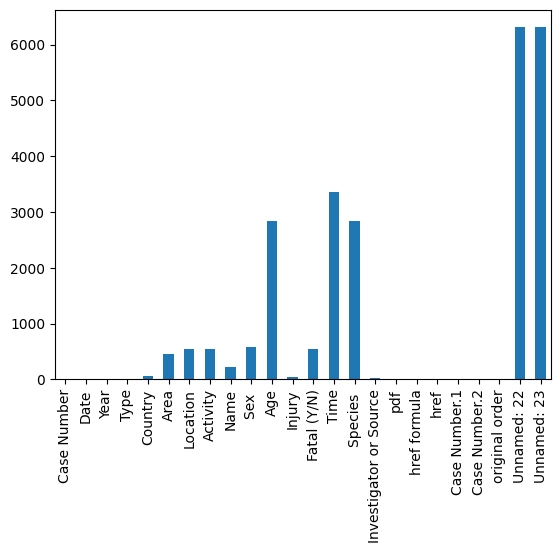

In [19]:
data.isnull().sum().plot.bar()

In [46]:
# Limpieza de fecha

In [46]:
df_cleaning['Year'] = df_cleaning['Year'].fillna('UKNOWN')
df_cleaning = df_cleaning[df_cleaning['Year'] != 'UKNOWN']

In [47]:
df_cleaning['Year'] = df_cleaning['Year'].replace(r'\.0', '', regex=True)

In [48]:
df_cleaning['Year'] = df_cleaning['Year'].astype(int)

In [49]:
df_cleaning['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       0
6298       0
6299       0
6300       0
6301       0
Name: Year, Length: 6300, dtype: int64

In [50]:
df_cleaning.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [51]:
# Limpieza de edad

In [52]:
df_cleaning['Age'] = df_cleaning['Age'].astype(str)

In [53]:
df_cleaning['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6300 entries, 0 to 6301
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
6300 non-null   object
dtypes: object(1)
memory usage: 98.4+ KB


In [54]:
df_cleaning['filter_age'] = df_cleaning['Age'].str.extract(r'(\d{2})')

In [55]:
df_cleaning['filter_age'].astype(str)

0        57
1        11
2        48
3       nan
4       nan
       ... 
6297    nan
6298    nan
6299    nan
6300    nan
6301     15
Name: filter_age, Length: 6300, dtype: object

In [56]:
print(df_cleaning['filter_age'].unique())

['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40' '28' '20' '24' '26' '49' '22' '31' '17' '13' '42' '50' '16' '82'
 '73' '68' '51' '39' '58' '47' '61' '65' '36' '66' '43' '72' '59' '27'
 '64' '23' '71' '44' '62' '63' '70' '53' '77' '74' '86' '84' '75' '87'
 '67' '81' '78']


In [57]:
print(df_cleaning['Age'].unique())

['57' '11' '48' 'nan' '18' '52' '15' '12' '32' '10' '21' '34' '30' '60'
 '33' '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45'
 '14' '40s' '28' '20' '24' '26' '49' '22' '7' '31' '17' '40' '13' '42' '3'
 '8' '50' '16' '82' '73' '20s' '68' '51' '39' '58' 'Teen' '47' '61' '65'
 '36' '66' '43' '60s' '9' '72' '59' '6' '27' '64' '23' '71' '44' '62' '63'
 '70' '18 months' '53' '30s' '50s' 'teen' '77' '74' '28 & 26' '5' '86'
 '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26' '8 or 10'
 '84' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '75' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18'
 '87' '67' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50'
 '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35' '23 & 26' '1'
 '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35'
 '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"' '13 or 18' '34 & 19'
 '33 & 26' '2 to 3 months' 'MAKE LINE GREEN' ' 43'

In [58]:
print(dict(df_cleaning['filter_age'].value_counts()))

{'17': 156, '18': 153, '20': 151, '19': 143, '15': 139, '16': 139, '21': 122, '22': 117, '25': 110, '24': 106, '14': 102, '13': 96, '30': 87, '28': 83, '26': 83, '23': 82, '27': 78, '29': 78, '12': 75, '32': 70, '35': 68, '10': 60, '40': 59, '31': 54, '34': 51, '38': 48, '33': 48, '36': 45, '43': 44, '37': 43, '11': 38, '42': 38, '39': 38, '41': 38, '50': 37, '52': 35, '45': 33, '47': 30, '44': 29, '49': 28, '46': 28, '48': 28, '55': 23, '51': 20, '60': 18, '54': 17, '57': 16, '58': 15, '53': 13, '61': 13, '59': 11, '56': 10, '69': 10, '63': 9, '62': 8, '68': 7, '70': 6, '65': 5, '66': 4, '64': 4, '77': 3, '71': 3, '73': 3, '74': 2, '75': 2, '78': 2, '86': 1, '84': 1, '72': 1, '87': 1, '67': 1, '81': 1, '82': 1}


In [59]:
df_cleaning['filter_age'].isna().sum() - df_cleaning['Age'].isna().sum()

2979

In [61]:
df_cleaning['Age'] = pd.to_numeric(df_cleaning['Age'], errors= 'coerce')
df_cleaning['Age'] = df_cleaning['Age'].fillna(-1).astype(int)

In [63]:
#df_cleaning.reset_index(drop=True)

In [64]:
# Sacar una nueva columna con los meses y otra con el año a partir de la columna 'Date'
# regex 101 https://regex101.com/

In [65]:
# Convertir a int
# Tomar solo los datos que sean a partir del año 1950 por ejemplo
df_cleaning['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       0
6298       0
6299       0
6300       0
6301       0
Name: Year, Length: 6300, dtype: int64

In [66]:
%time
df_cleaning['dias'] = df_cleaning['Date'].str.extract(r'(\d{2})-').replace('00', '01')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


In [67]:
df_cleaning['mes'] = df_cleaning['Date'].str.extract(r'-(\w{3})-')

In [68]:
df_cleaning['Year'] = df_cleaning['Year'].values.astype('str')

In [69]:
df_cleaning.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,filter_age,dias,mes
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,57,25,Jun
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,11,18,Jun


In [70]:
df_cleaning['date_sum'] = df_cleaning['dias']+'-'+df_cleaning['mes']+'-'+df_cleaning['Year']

In [72]:
df_cleaning['date_formated'] = pd.to_datetime(df_cleaning['date_sum'], errors='coerce')
df_cleaning['date_sum'] = df_cleaning['date_sum'].fillna('UKNOWN')
df_cleaning = df_cleaning[df_cleaning['date_sum'] != 'UKNOWN']

In [73]:
d = df_cleaning[~df_cleaning['date_sum'].str.contains('1000')]

In [85]:
# Muestra de las columnas para seleccionarlas
df_cleaning.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'filter_age', 'dias', 'mes', 'date_sum',
       'date_formated'],
      dtype='object')

In [86]:
# Filtrado de columnas
# Se seleccionan las columnas útiles para realizar el análisis
cols_selection = ['Case Number', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'filter_age', 'mes', 'date_sum',
       'date_formated']

In [88]:
df_cleaning_filtered = df_cleaning[cols_selection]

In [89]:
# Rename columns
df_cleaning_filtered.rename(columns = {'date_formated':'Date', 'mes': 'Month', 'Sex ': 'Sex', 'filter_age': 'Age'}, inplace = True)

In [91]:
df_cleaning_filtered.head(2)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Time,Species,Age,Month,date_sum,Date
0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,57,Jun,25-Jun-2018,2018-06-25
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,14h00 -15h00,NaN,11,Jun,18-Jun-2018,2018-06-18


In [92]:
# Limpeza del sexo

In [80]:
df_cleaning_filtered['Sex'] = df_cleaning_filtered['Sex'].str.replace('M ', 'M').replace('lli', 'M')

In [81]:
df_cleaning_filtered['Sex'].value_counts()

M    4352
F     570
N       2
.       1
Name: Sex, dtype: int64

In [82]:
df_final = df_cleaning_filtered

...

In [83]:
name = 'clean_data.csv'

In [83]:
df_final.to_csv(f'../data/{name}', index=False)